Model development process:
1. Choose the appropriate type of model: Binary Classification, Multiclass Classification or Regression
2. Preprocess the data; vectorize
2. Experiment with hyperparameters. Create a validation subset of the training data to monitor/prevent overfitting
3. Train the model using ideal parameters with complete training data set and test against test set.

### Model Parameters
Layers:
- **# Hidden Layers**. Number of layers between input and output layers.
- **# Hidden Units**. Dimensionality of layer weights; should not be less than the dimension of the output data.
- **Activation Function**. Provides non-linearity to the model.
  - 'relu' common for hidden layers; 'tanh' is an alternative
  - 'sigmoid' used for binary classification, produces probability distribution 0 <= N <= 1.
  - 'softmax' used for multiclass classification, produces a vector of probabilities that sums to 1.
  - For regression models, use a Dense layer with 1 hidden units and no activation function
  
Compile:
- **Optimizer**. How the model is trained. 'rmsprop' (root mean squared propogation, gradient descent) is the most common.
- **Loss**. Depends on the type of model:
  - 'binary_crossentropy': Use for binary classification
  - 'categorical_crossentropy': Use for multiclass classification when results is a one-hot vector
  - 'sparse_categorical_crossentropy': Use for multiclass classification when results are integers
  - 'mse': Use for regression
- **Metrics**.
  - 'accuracy': Used for classification models
  - 'mean_absolute_error': Used for regression models

Fitting:
- **Epochs**. How many times to train on the whole training dataset
- **Batch Size**. How many samples to include in each pass; usually an exponent of 2, e.g. 128
- **Validation_data**. A dataset that is not used for training, but tested after each epoch. Used to detect overfit.

# Binary Classification

2022-03-02 11:13:51.039568: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


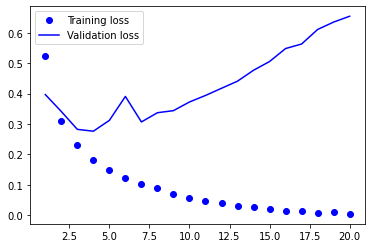

In [1]:
'''
Load data (~80MB). IMDB reviews which are classified as positive or negative
Samples include the most common 10_000 words, converted to an index
'''
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# print(len(train_data)) # >>> 25000
# print(train_data[0][:10], len(train_data[0])) # >>> [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
# print(len(train_data[0])) # >>> 218
# print(train_labels[0]) # >>> 1

'''
Convert sequences of word indexes to vectors of all words included.
e.g. [0, 3, 1, 6] -> [1., 1., 0, 1., 0., 0., 1., 0., 0., 0.]
'''
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    """Convert samples from a number to a vector that matches its index"""
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

'''
Recast labels as float32
'''
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

'''
Build model, split a validation set, run 20 epochs
'''
from keras import models
from keras import layers

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

'''
Plot the accuracy metric to check for overfit
'''
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
plt.plot(range(1, len(loss_values) + 1), 
         loss_values, 
         'bo', 
         label='Training loss')
plt.plot(range(1, len(val_loss_values) + 1), 
         val_loss_values, 
         'b', 
         label='Validation loss')
plt.legend()
plt.show()

In [2]:
'''
The model begins to overfit after 4 epochs, so now train for 
4 epochs will full trainig set and evaluate on test set.
'''
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
(test_loss, test_accuracy) = model.evaluate(x_test, y_test)
print('Accuracy:', test_accuracy, 'Loss:', test_loss)

Epoch 1/4
49/49 [==============================] - 3s 35ms/step - loss: 0.4556 - accuracy: 0.8208
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2614 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2017 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3458 - accuracy: 0.8626
Accuracy: 0.862559974193573 Loss: 0.34576043486595154


In [11]:
from keras import models
from keras import layers

'''
Experiment with tuning hyperparameters:
- Try using one or three hidden layers
- Try using layers with more hidden units or fewer hidden units
- Try using the mse loss function instead of binary_crossentropy
- Try using the tanh activation instead of relu
'''

def get_model(hidden_layers=2, hidden_units=16, loss='binary_crossentropy', 
              activation='relu'):
    """A helper function to generate and run models given some keyword arguments"""
    model = models.Sequential()
    for _ in range(hidden_layers):
        model.add(layers.Dense(hidden_units, activation=activation, input_shape=(10000,)))
        model.add(layers.Dense(hidden_units, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss=loss,
                  metrics=['accuracy'])
    return model
        
tests = [{'hidden_layers': 1}, {'hidden_layers': 3}, {'hidden_units': 8}, {'hidden_units': 32}, 
         {'loss': 'mse'}, {'activation': 'tanh'}]
for kwargs in tests:
    model = get_model(**kwargs)
    model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
    results = model.evaluate(x_test, y_test, verbose=0)
    print(kwargs, results)

{'hidden_layers': 1} [0.2897002100944519, 0.8855599761009216]
{'hidden_layers': 3} [0.3287105858325958, 0.8789200186729431]
{'hidden_units': 8} [0.3466544449329376, 0.8654800057411194]
{'hidden_units': 32} [0.33313536643981934, 0.8756399750709534]
{'loss': 'mse'} [0.11117497831583023, 0.8517199754714966]
{'activation': 'tanh'} [0.3528871536254883, 0.868399977684021]


# Single-label Multiclass Classification

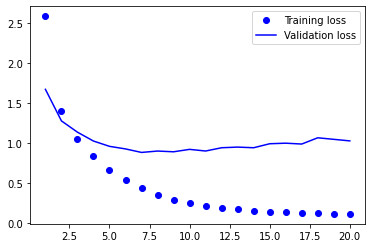

In [3]:
'''
Load news clips from Reuters dataset
'''
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

'''
Samples are a sequence of word indexes; can create a helper function
to decode samples back into words.
'''
word_index = reuters.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
def decode(item):
    return ' '.join([reverse_word_index.get(i-3, '?') for i in item])
# print(len(train_data)) # >>> 8982
# print(len(test_data)) # >>> 2246
# print(train_data[0][:10]) # >>> [1, 2, 2, 8, 43, 10, 447, 5, 25, 207]
# print(decode(train_data[0][:10])) # >>> ? ? ? said as a result of its december
# print(train_labels[0]) # >>> 3

'''
Again, vectorize the sequences so they are of same length.
Also convert output from an integer to a 'one-hot vector':
e.g. '4' -> [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,]
'''
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

'''
Build the model, split out validation set, run for 20 epochs
'''
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

'''
Check for overfit
'''
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [4]:
'''
The model begins to overfit after 9 epochs, so now train for 
9 epochs will full training set and evaluate on test set.
'''
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,  # Overfit after about 9 epochs
          batch_size=512,
          validation_data=(x_val, y_val),
          verbose=0)
(test_loss, test_accuracy) = model.evaluate(x_test, one_hot_test_labels)
print('Accuracy:', test_accuracy, 'Loss:', test_loss)

71/71 [==============================] - 0s 4ms/step - loss: 1.0963 - accuracy: 0.7845
Accuracy: 0.7845057845115662 Loss: 1.096298098564148


# Linear Regression

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


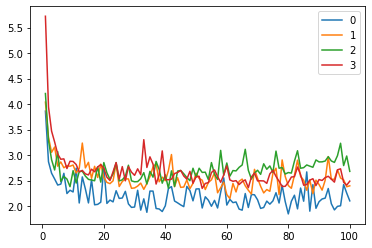

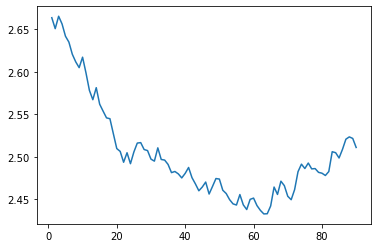

In [5]:
'''
Load the boston housing data. Here we are trying to predict the 
price of a house based on several factors.
'''
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
# print(train_data.shape) # >>> (404, 13)
# print(test_data.shape) # >>> (102, 13)
# print(train_data[0]) # >>> [1.23247, 0., 8.14, 0., 0.538, 6.142...]

'''
Because different features are at very different scales (some in
the hundreds, some decimals), we NORMALIZE all the data.
'''
mean = train_data.mean(axis=0) # Calculate mean of each feature
train_data -= mean # Subtract mean for each sample
std = train_data.std(axis=0) # Calculate stdev of each feature
train_data /= std # Divide each sample by stdev

test_data -= mean # Repeat with test data
test_data /= std

'''
Because the training set includes few samples (404), we don't separate
a validation set like before; instead we use K-FOLD VALIDATION:
1. Split training data into k groups
2. For each group i, train the model on remaining k-1 groups, then
   validate against i.
3. Use the average loss, accuracy and overfit time of all k groups

So we make a helper function to generate the model, and then use a 
loop for the k-fold validation
'''

from keras import models
from keras import layers
import numpy as np

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    # Split out validation set
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Split training data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]])
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

'''
Plot history for each k-fold
'''
for i, history in enumerate(all_mae_histories):
    plt.plot(range(1, len(history) + 1), history, label=i)
plt.legend()
plt.show()

'''
Plot combined accuracy with smoothing, clip first 10 values
'''
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.show()

In [6]:
'''
It looks like the overfit happens around epoch 60, so we fit the
model for 80 epochs with the full training set, and validate against
test set.
'''
model = build_model()
model.fit(train_data, train_targets,
          epochs=60, batch_size=16, verbose=0)
(test_mse, test_mae) = model.evaluate(test_data, test_targets)
print('Mean Average Error:', test_mae)

4/4 [==============================] - 0s 2ms/step - loss: 18.2853 - mean_absolute_error: 2.7723
Mean Average Error: 2.772348403930664
